<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Stacked Charts**


Estimated time needed: **45** minutes


In this lab, you will focus on visualizing data specifically using stacked charts. You will use SQL queries to extract the necessary data and apply stacked charts to analyze the composition and comparison within the data.


## Objectives


In this lab, you will perform the following:


- Visualize the composition of data using stacked charts.

- Compare multiple variables across different categories using stacked charts.

- Analyze trends within stacked chart visualizations.


## Setup: Downloading and Loading the Data
**Install the libraries**


In [1]:
!pip install pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 117.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 139.5 MB/s eta 0:00:00


In [2]:
!pip install matplotlib
!pip install numpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 100.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 124.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 49.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 114.6 MB/s eta 0:00:00


**Download and Load the Data**


To start, download and load the dataset into a `pandas` DataFrame.



### Step 1: Download the dataset


In [3]:
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

--2025-12-26 15:11:07--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  48.8MB/s    in 3.1s    

2025-12-26 15:11:10 (48.8 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



### Step 2: Import necessary libraries and load the dataset


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Load the data


In [5]:
df = pd.read_csv("survey-data.csv")

### Display the first few rows of the data to understand its structure


In [6]:
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Task 1: Stacked Chart for Composition of Job Satisfaction Across Age Groups


##### 1. Stacked Chart of Median `JobSatPoints_6` and `JobSatPoints_7` for Different Age Groups


Visualize the composition of job satisfaction scores (`JobSatPoints_6` and `JobSatPoints_7`) across various age groups. This will help in understanding the breakdown of satisfaction levels across different demographics.



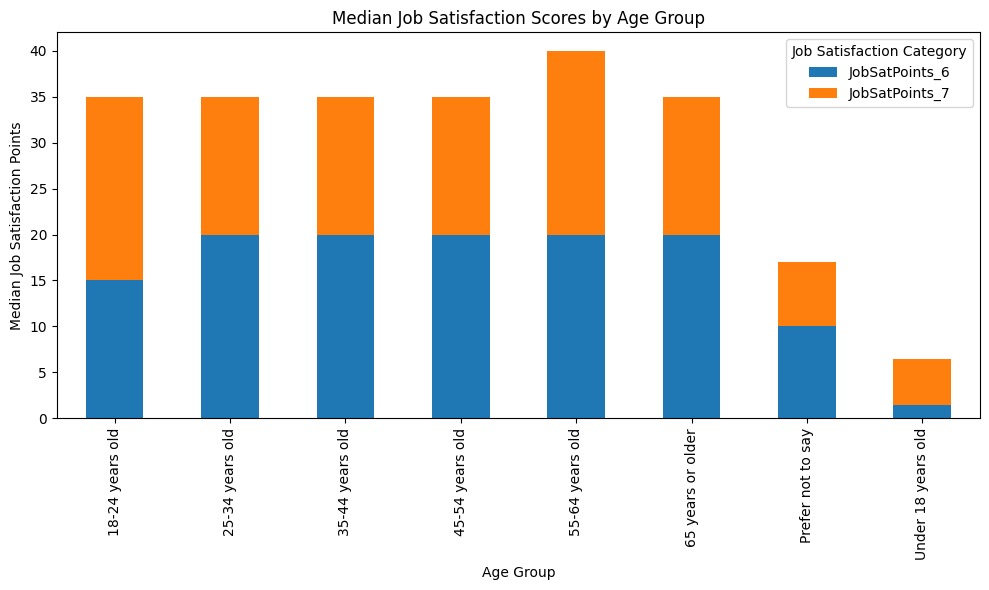

In [7]:
##Write your code here
# Group by Age and calculate median satisfaction scores
age_job_sat = df.groupby("Age")[["JobSatPoints_6", "JobSatPoints_7"]].median()

# Plot stacked bar chart
age_job_sat.plot(
    kind="bar",
    stacked=True,
    figsize=(10, 6)
)

plt.title("Median Job Satisfaction Scores by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Median Job Satisfaction Points")
plt.legend(title="Job Satisfaction Category")
plt.tight_layout()
plt.show()

# This stacked bar chart shows how median job satisfaction scores at levels 6 and 7 are distributed across different age groups. In most age groups, JobSatPoints_7 makes up a larger share of overall satisfaction, indicating that higher satisfaction is more common than moderate satisfaction. Older age groups tend to have a stronger concentration at satisfaction level 7, suggesting job satisfaction generally increases with age, while overall satisfaction remains fairly consistent across demographics.

##### Stacked Chart of `JobSatPoints_6` and `JobSatPoints_7` for Employment Status


Create a stacked chart to compare job satisfaction (`JobSatPoints_6` and `JobSatPoints_7`) across different employment statuses. This will show how satisfaction varies by employment type.


/tmp/ipykernel_298/1961940945.py:22: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


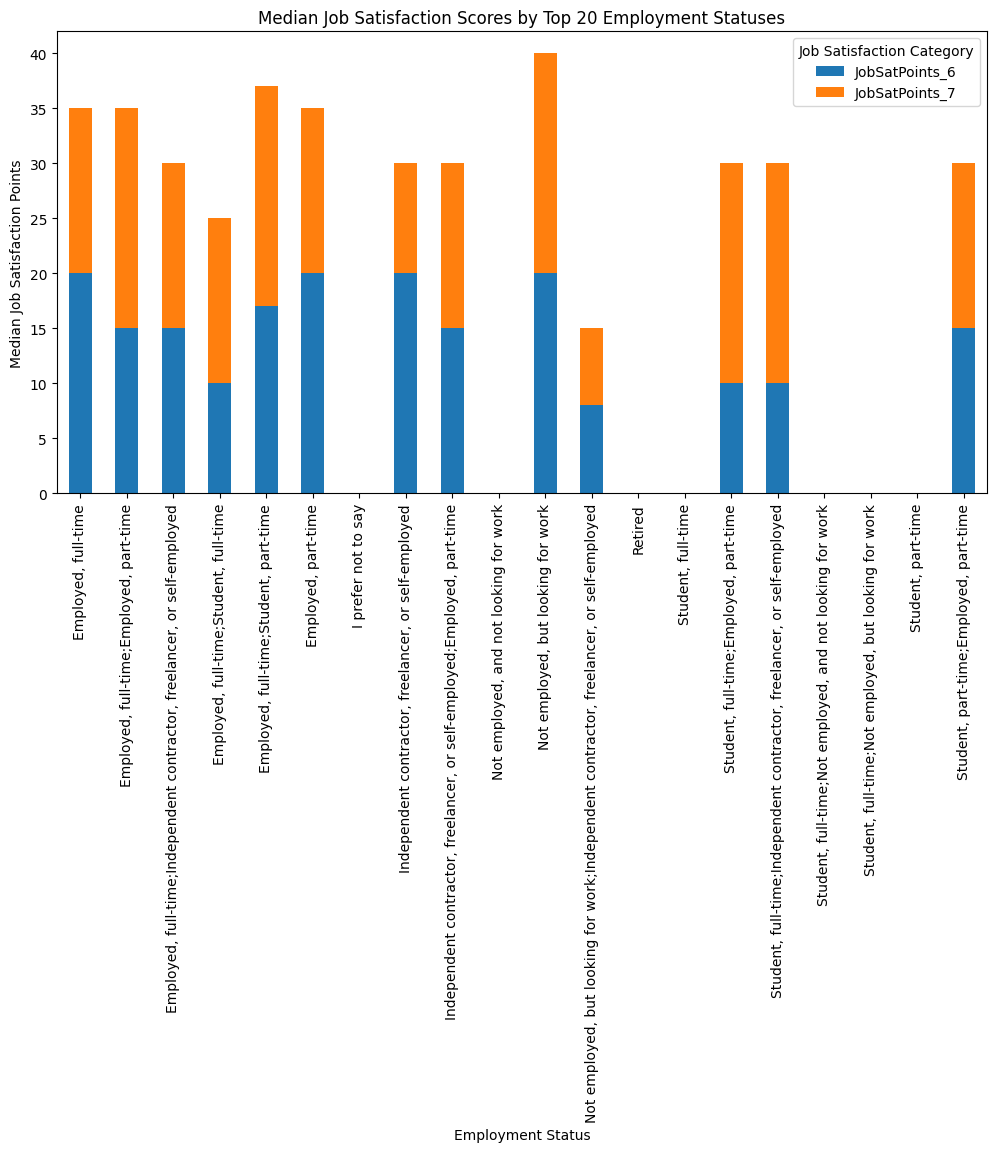

In [9]:
##Write your code here
# Get top 20 employment statuses by respondent count
top_20_employment = df['Employment'].value_counts().head(20).index

# Filter dataset to top 20 employment statuses
df_top20 = df[df['Employment'].isin(top_20_employment)]

# Group by Employment and calculate median satisfaction scores
employment_job_sat = df_top20.groupby("Employment")[["JobSatPoints_6", "JobSatPoints_7"]].median()

# Plot stacked bar chart
employment_job_sat.plot(
    kind="bar",
    stacked=True,
    figsize=(12, 6)
)

plt.title("Median Job Satisfaction Scores by Top 20 Employment Statuses")
plt.xlabel("Employment Status")
plt.ylabel("Median Job Satisfaction Points")
plt.legend(title="Job Satisfaction Category")
plt.tight_layout()
plt.show()

# This stacked bar chart compares median job satisfaction scores at levels 6 and 7 across different employment statuses. Full-time and employed respondents tend to show higher overall satisfaction, with JobSatPoints_7 contributing the larger share of the total. Other employment types display a more balanced distribution between satisfaction levels 6 and 7, indicating slightly lower or more varied satisfaction. Overall, the chart suggests that job stability is associated with higher levels of job satisfaction.

### Task 2: Stacked Chart for Compensation and Job Satisfaction by Age Group


##### This stacked chart visualizes the composition of compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`) specifically for respondents aged 30-35.


['Under 18 years old' '35-44 years old' '45-54 years old'
 '18-24 years old' '25-34 years old' '55-64 years old' 'Prefer not to say'
 '65 years or older']
Rows in age 30–35 subset: 11808


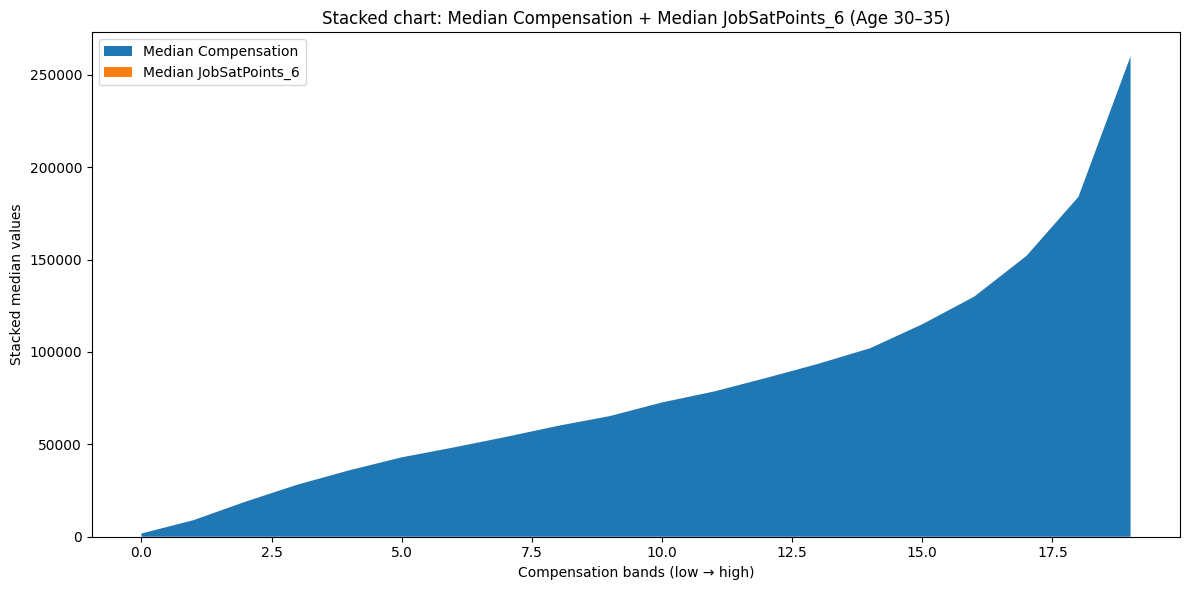

In [14]:
##Write your code here
# --- 1) Quick check: what does Age look like?
print(df["Age"].dropna().unique()[:15])

# --- 2) Build a robust "is 30–35" mask that works for both numeric + ranged strings
age_series = df["Age"]

# Case A: Age is numeric (or can be converted)
age_num = pd.to_numeric(age_series, errors="coerce")
mask_num = age_num.between(30, 35, inclusive="both")

# Case B: Age is a range like "25-34"
age_str = age_series.astype(str)

# Extract lower/upper bounds when Age looks like "##-##"
bounds = age_str.str.extract(r"(?P<low>\d+)\s*-\s*(?P<high>\d+)")
low = pd.to_numeric(bounds["low"], errors="coerce")
high = pd.to_numeric(bounds["high"], errors="coerce")

# Overlap test: [low, high] overlaps [30, 35]
mask_range = (low <= 35) & (high >= 30)

# Combine both approaches
mask_30_35 = mask_num | mask_range

df_30_35 = df.loc[mask_30_35, ["ConvertedCompYearly", "JobSatPoints_6"]].dropna()

print("Rows in age 30–35 subset:", len(df_30_35))
if df_30_35.empty:
    raise ValueError("No rows found for ages 30–35. Check df['Age'] values and adjust the filter.")

# --- 3) Create a stacked chart:
# Bin compensation into 20 bands, then compute medians in each band
df_30_35 = df_30_35[df_30_35["ConvertedCompYearly"] > 0].copy()

df_30_35["CompBand"] = pd.qcut(df_30_35["ConvertedCompYearly"], q=20, duplicates="drop")
grp = df_30_35.groupby("CompBand", observed=True)

x = np.arange(grp.size().shape[0])
comp_median = grp["ConvertedCompYearly"].median().to_numpy()
sat_median = grp["JobSatPoints_6"].median().to_numpy()

plt.figure(figsize=(12,6))
plt.stackplot(x, comp_median, sat_median, labels=["Median Compensation", "Median JobSatPoints_6"])
plt.title("Stacked chart: Median Compensation + Median JobSatPoints_6 (Age 30–35)")
plt.xlabel("Compensation bands (low → high)")
plt.ylabel("Stacked median values")
plt.legend(loc="upper left")
plt.tight_layout()
plt.show()

# This stacked chart focuses on respondents around ages 30–35 by showing how median compensation and median JobSatPoints_6 change across compensation bands from lower to higher pay. If the job satisfaction layer stays relatively steady while compensation rises, it suggests satisfaction is not strongly tied to pay within this age range; if it rises noticeably in higher bands, it suggests higher compensation aligns with higher satisfaction for these respondents.

##### Stacked Chart of Median Compensation and Job Satisfaction Across Age Group


Compare the median compensation and job satisfaction metrics across different age groups. This helps visualize how compensation and satisfaction levels differ by age.


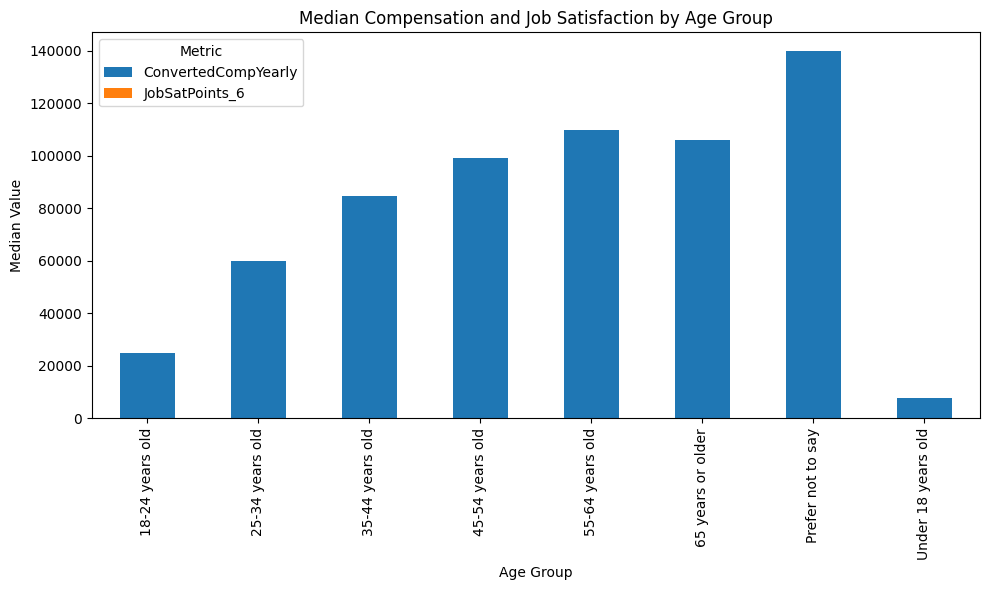

In [15]:
##Write your code here
# Group by Age and calculate medians
age_summary = df.groupby("Age")[["ConvertedCompYearly", "JobSatPoints_6"]].median()

# Plot stacked bar chart
age_summary.plot(
    kind="bar",
    stacked=True,
    figsize=(10, 6)
)

plt.title("Median Compensation and Job Satisfaction by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Median Value")
plt.legend(title="Metric")
plt.tight_layout()
plt.show()

# This stacked bar chart compares median compensation and median job satisfaction across different age groups. Compensation generally increases with age, contributing a larger portion of the stacked bars in older age groups, while job satisfaction remains relatively stable across demographics. The visualization highlights that although earnings tend to rise with age, satisfaction levels do not increase at the same rate, suggesting compensation and job satisfaction are not perfectly aligned across age groups.

### Task 3: Comparing Data Using Stacked Charts


##### 1. Stacked Chart of Preferred Databases by Age Group




Visualize the top databases that respondents from different age groups wish to learn. Create a stacked chart to show the proportion of each database in each age group.


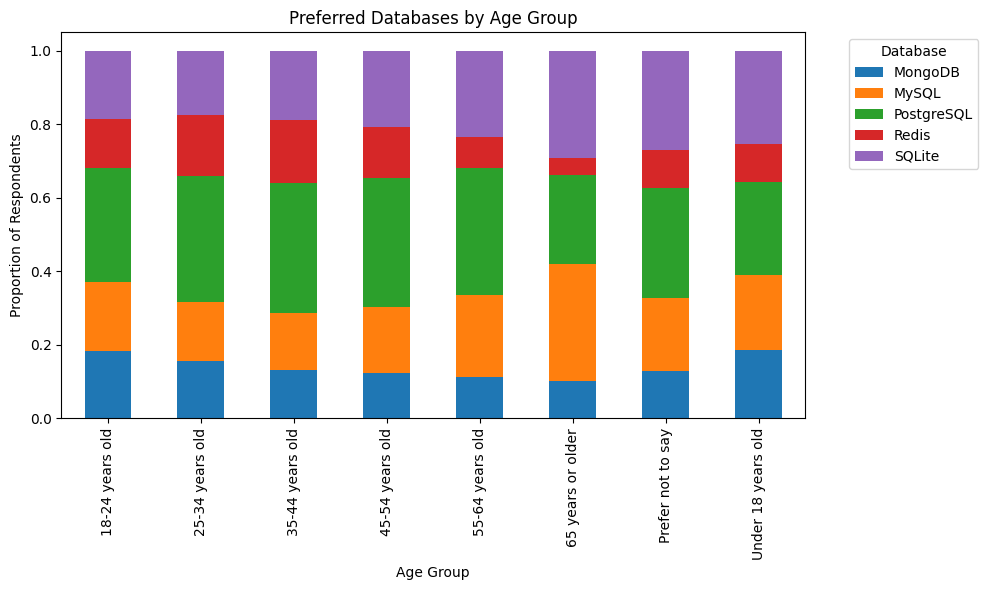

In [16]:
##Write your code here
# Split multiple database entries into separate rows
db_expanded = df[['Age', 'DatabaseWantToWorkWith']].dropna()
db_expanded = db_expanded.assign(
    Database=db_expanded['DatabaseWantToWorkWith'].str.split(';')
).explode('Database')

# Get top 5 most desired databases overall
top_databases = db_expanded['Database'].value_counts().head(5).index

# Filter to top databases only
db_filtered = db_expanded[db_expanded['Database'].isin(top_databases)]

# Create counts by Age and Database
db_counts = (
    db_filtered
    .groupby(['Age', 'Database'])
    .size()
    .unstack(fill_value=0)
)

# Convert counts to proportions
db_proportions = db_counts.div(db_counts.sum(axis=1), axis=0)

# Plot stacked bar chart
db_proportions.plot(
    kind='bar',
    stacked=True,
    figsize=(10, 6)
)

plt.title("Preferred Databases by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Proportion of Respondents")
plt.legend(title="Database", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# This stacked chart shows the proportion of preferred databases across different age groups. While popular databases appear consistently across all ages, younger respondents tend to show more diverse interests, whereas older age groups concentrate their preferences around fewer, well-established database technologies. Overall, the chart highlights how database learning preferences vary slightly by age but are largely driven by widely adopted platforms.

##### 2. Stacked Chart of Employment Type by Job Satisfaction


Analyze the distribution of employment types within each job satisfaction level using a stacked chart. This will provide insights into how employment types are distributed across various satisfaction ratings.


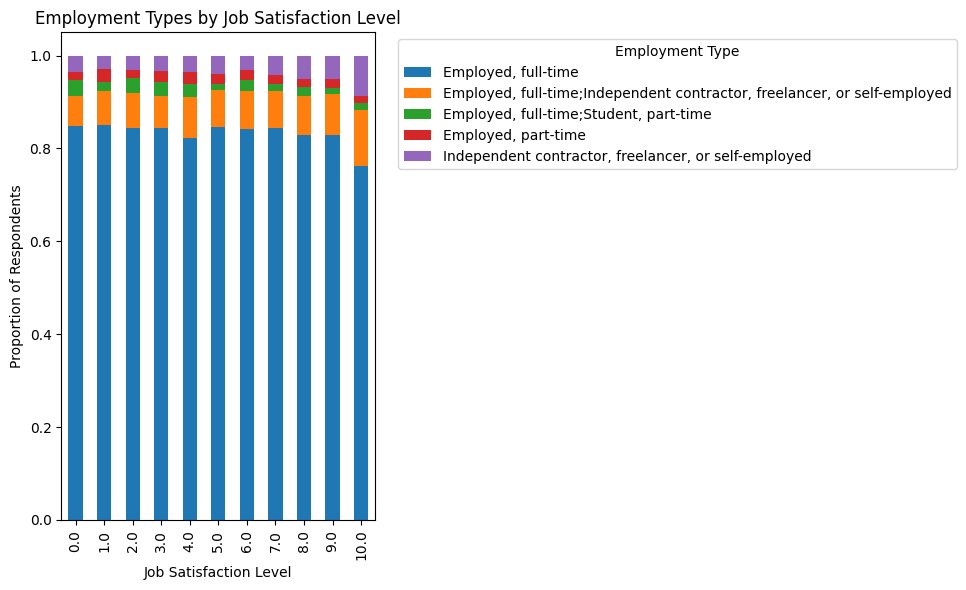

In [17]:
##Write your code here
# Select relevant columns and drop missing values
emp_sat = df[['Employment', 'JobSat']].dropna()

# Get top 5 employment types to keep chart readable
top_employment = emp_sat['Employment'].value_counts().head(5).index
emp_sat = emp_sat[emp_sat['Employment'].isin(top_employment)]

# Create counts of employment types by job satisfaction level
emp_counts = (
    emp_sat
    .groupby(['JobSat', 'Employment'])
    .size()
    .unstack(fill_value=0)
)

# Convert counts to proportions
emp_proportions = emp_counts.div(emp_counts.sum(axis=1), axis=0)

# Plot stacked bar chart
emp_proportions.plot(
    kind='bar',
    stacked=True,
    figsize=(10, 6)
)

plt.title("Employment Types by Job Satisfaction Level")
plt.xlabel("Job Satisfaction Level")
plt.ylabel("Proportion of Respondents")
plt.legend(title="Employment Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# This stacked chart illustrates how different employment types are distributed across job satisfaction levels. Full-time employment accounts for the largest proportion across most satisfaction ratings, while other employment types contribute smaller shares. As job satisfaction increases, the distribution becomes more concentrated among full-time roles, suggesting a relationship between employment stability and higher job satisfaction.

### Task 4: Exploring Technology Preferences Using Stacked Charts


##### 1. Stacked Chart for Preferred Programming Languages by Age Group


Analyze how programming language preferences (`LanguageAdmired`) vary across age groups.


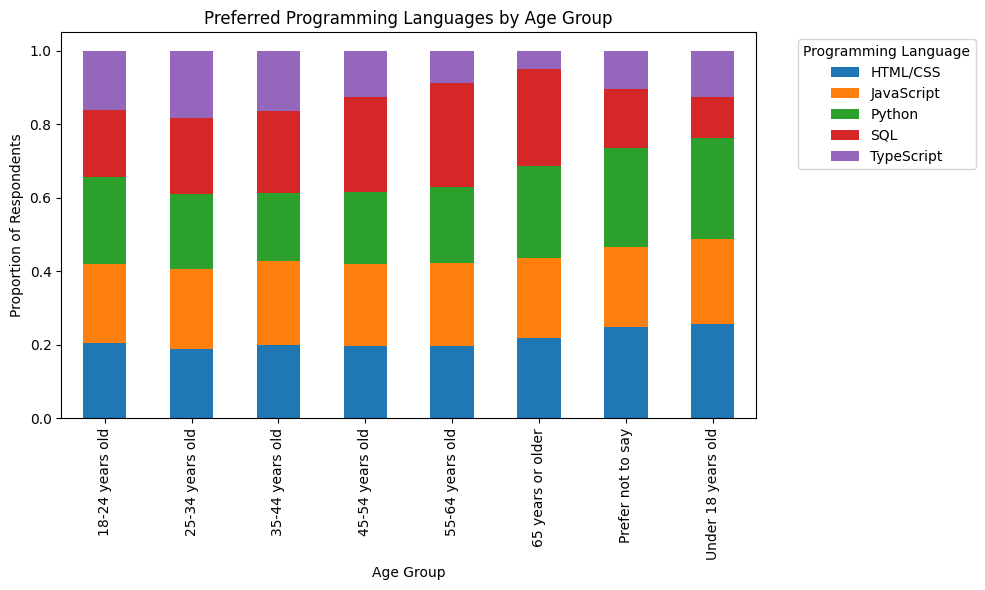

In [18]:
##Write your code here
# Select relevant columns and drop missing values
lang_df = df[['Age', 'LanguageAdmired']].dropna()

# Split multiple languages into separate rows
lang_df = lang_df.assign(
    Language=lang_df['LanguageAdmired'].str.split(';')
).explode('Language')

# Keep top 5 admired languages to keep chart readable
top_languages = lang_df['Language'].value_counts().head(5).index
lang_df = lang_df[lang_df['Language'].isin(top_languages)]

# Count languages by age group
lang_counts = (
    lang_df
    .groupby(['Age', 'Language'])
    .size()
    .unstack(fill_value=0)
)

# Convert counts to proportions
lang_proportions = lang_counts.div(lang_counts.sum(axis=1), axis=0)

# Plot stacked bar chart
lang_proportions.plot(
    kind='bar',
    stacked=True,
    figsize=(10, 6)
)

plt.title("Preferred Programming Languages by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Proportion of Respondents")
plt.legend(title="Programming Language", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# This stacked chart shows how admired programming language preferences differ across age groups. While a few dominant languages appear consistently across all ages, younger respondents tend to show greater diversity in their language interests, whereas older age groups concentrate more heavily on established languages. Overall, the visualization highlights both shared preferences and generational variation in programming language admiration.

##### 2. Stacked Chart for Technology Adoption by Employment Type


Explore how admired platforms (`PlatformAdmired`) differ across employment types (e.g., full-time, freelance)


/tmp/ipykernel_298/2648699537.py:38: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


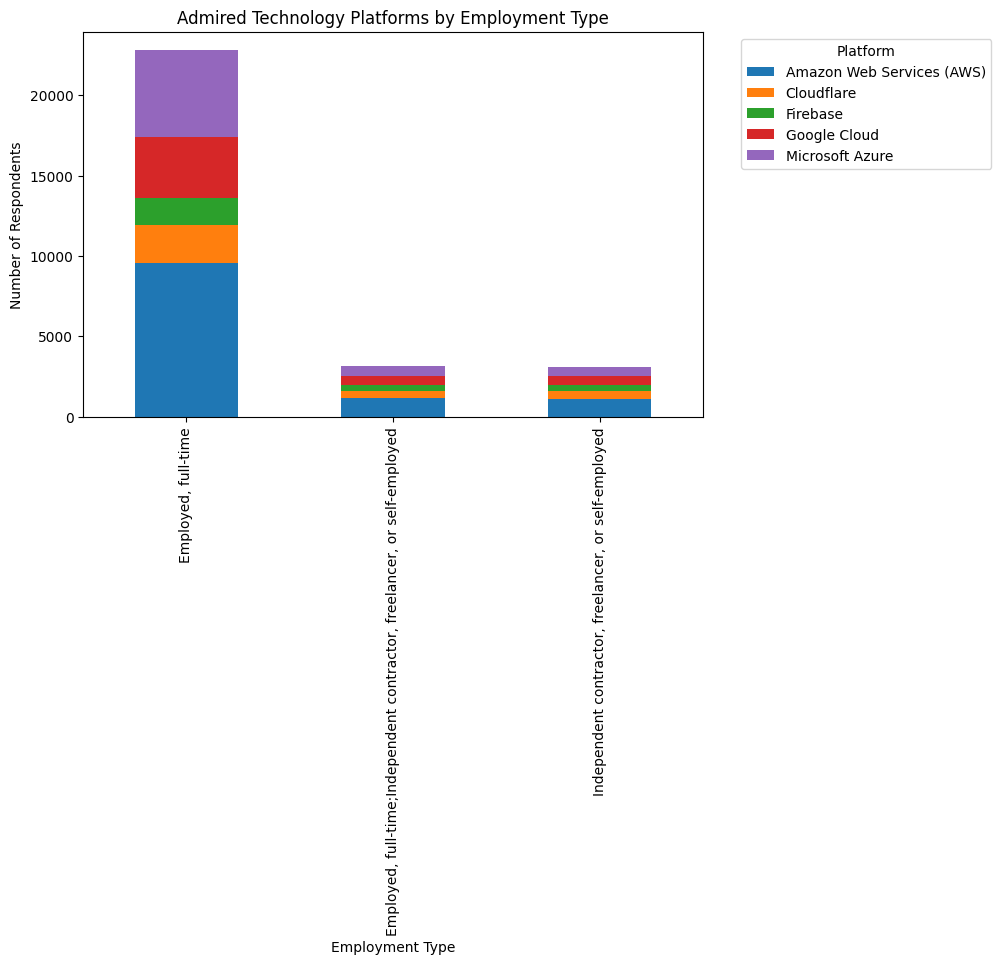

In [25]:
##Write your code here

# Keep only needed columns
plat_df = df[['Employment', 'PlatformAdmired']].dropna()

# Keep top 3 employment types (simple, clean x-axis)
top_employment = plat_df['Employment'].value_counts().head(3).index
plat_df = plat_df[plat_df['Employment'].isin(top_employment)]

# Split platforms into separate rows
plat_df = plat_df.assign(
    Platform=plat_df['PlatformAdmired'].str.split(';')
).explode('Platform')

# Keep top 5 admired platforms
top_platforms = plat_df['Platform'].value_counts().head(5).index
plat_df = plat_df[plat_df['Platform'].isin(top_platforms)]

# Count platforms by employment type
plat_counts = (
    plat_df
    .groupby(['Employment', 'Platform'])
    .size()
    .unstack(fill_value=0)
)

# Plot stacked bar chart
plat_counts.plot(
    kind='bar',
    stacked=True,
    figsize=(8, 5)
)

plt.title("Admired Technology Platforms by Employment Type")
plt.xlabel("Employment Type")
plt.ylabel("Number of Respondents")
plt.legend(title="Platform", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# This stacked chart shows how admired technology platforms differ across the most common employment types. Full-time roles dominate platform admiration, while other employment types contribute smaller but varied shares. By limiting the chart to the most common employment categories, the visualization clearly highlights differences in platform preferences without overcrowding the axis.

### Final Step: Review


In this lab, you focused on using stacked charts to understand the composition and comparison within the dataset. Stacked charts provided insights into job satisfaction, compensation, and preferred databases across age groups and employment types.


## Summary


After completing this lab, you will be able to:

- Use stacked charts to analyze the composition of data across categories, such as job satisfaction and compensation by age group.

- Compare data across different dimensions using stacked charts, enhancing your ability to communicate complex relationships in the data.

- Visualize distributions across multiple categories, such as employment type by satisfaction, to gain a deeper understanding of patterns within the dataset.


## Author:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-10-28|1.2|Madhusudhan Moole|Updated lab|
|2024-10-16|1.1|Madhusudhan Moole|Updated lab|
|2024-10-15|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
